<h1>Cegpy</h1>

<h3>Example 3: Chain Event Graph Reduction After Evidence is Observed</h3>

A complete CEG shows all possible trajectories that an individual undergoing the process might experience. However, on observing any evidence, certain or uncertain, some edges and nodes become unvisited with probability 1. The CEG model can be reduced such that these edges and nodes are excluded, without any loss of information. Once reduced, the probabilities displayed can be also be revised.


For this example, we will use the `falls.xlsx` dataset.

<h3>Step 1: Create the CEG as before.</h3>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 5.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


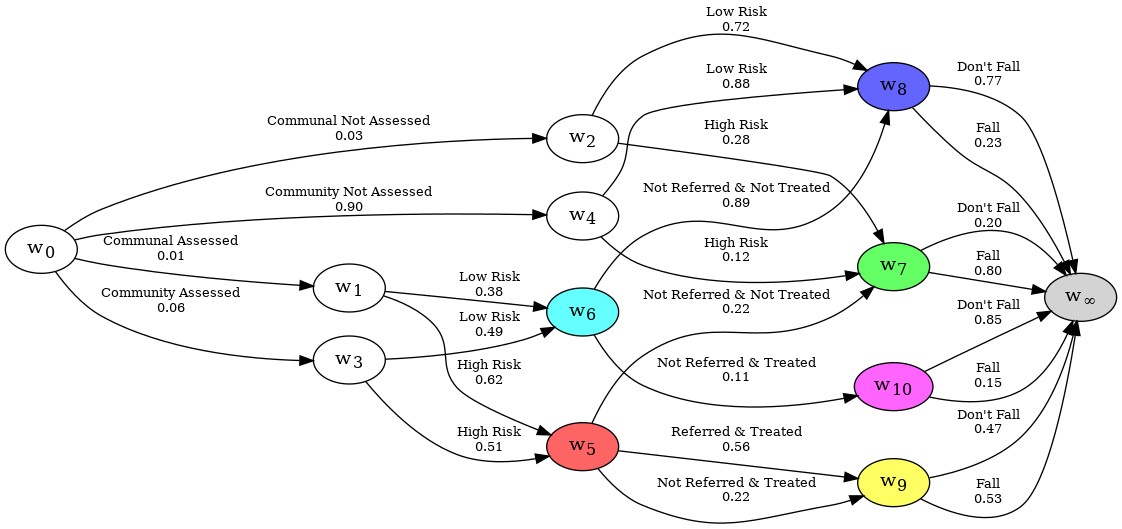

In [1]:
from cegpy import StagedTree, ChainEventGraph, ChainEventGraphReducer
import pandas as pd
%pip install openpyxl

dataframe = pd.read_excel("falls.xlsx")

staged_tree = StagedTree(dataframe)
staged_tree.calculate_AHC_transitions()

falls_ceg = ChainEventGraph(staged_tree)
falls_ceg.create_figure()

<h3>Step 2: Creating a CEG Reducer</h3>

The `ChainEventGraphReducer` class takes the CEG and reduces it. It can be instantiated like so:

In [2]:
from cegpy import ChainEventGraphReducer

reducer = ChainEventGraphReducer(falls_ceg)

<h3>Step 3: Adding Observed Evidence</h3>

There are multiple ways to add evidence, both certain and uncertain. 
If a single edge was observed, this can be added with the method `.add_certain_edge()`.

When printed, the Reducer class will show the evidence which has been loaded into it. 

If it was observed that an individual was high risk and subsequently fell, the edge from 
w<sub>7</sub> &rarr; w<sub>$\infty$</sub>

In [3]:
reducer.add_certain_edge(
    src="w7", 
    dst=falls_ceg.sink, 
    label="Fall",
)
print(reducer)

The evidence you have given is as follows:
 Evidence you are certain of:
   Edges = [
     ('w7', 'w_infinity', 'Fall'),
   ]
   Nodes = {}
 Evidence you are uncertain of:
   Edges = []
   Nodes = {
   }




<h3>Step 4: Display the reduced CEG</h3>

Once all the evidence has been loaded in, the CEG can be reduced. 
The attribute `graph` provides an updated `ChainEventGraph` object which can then be displayed with the `.create_figure()` method. 

_Note: The creation of the new CEG does not modify the original CEG._

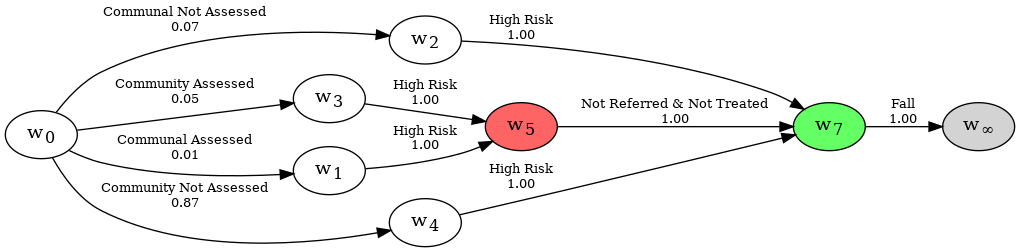

In [4]:
reducer.graph.create_figure()

In [5]:
reducer.add_uncertain_node_set({"w1", "w3"})
reducer.add_certain_edge("w7", falls_ceg.sink, "Fall")
print(reducer)

The evidence you have given is as follows:
 Evidence you are certain of:
   Edges = [
     ('w7', 'w_infinity', 'Fall'),
     ('w7', 'w_infinity', 'Fall'),
   ]
   Nodes = {}
 Evidence you are uncertain of:
   Edges = []
   Nodes = {
     {'w3', 'w1'},
   }




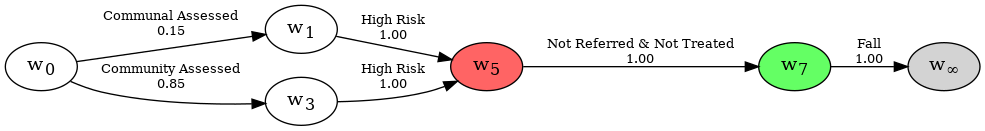

In [6]:
reducer.graph.create_figure()

If you'd like to add different evidence to the same object, first, clear the evidence from the object.

In [7]:
reducer.clear_all_evidence()
print(reducer)

The evidence you have given is as follows:
 Evidence you are certain of:
   Edges = []
   Nodes = {}
 Evidence you are uncertain of:
   Edges = []
   Nodes = {
   }




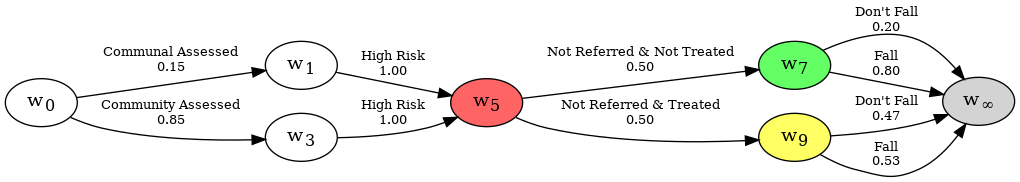

In [8]:
reducer.add_uncertain_edge_set_list([   
        {
            ("w1", "w5", "High Risk"),
            ("w3", "w5", "High Risk"),
        },
        {
            ("w5", "w9", "Not Referred & Treated"),
            ("w5", "w7", "Not Referred & Not Treated"),
        },

    ]
)
reducer.graph.create_figure()

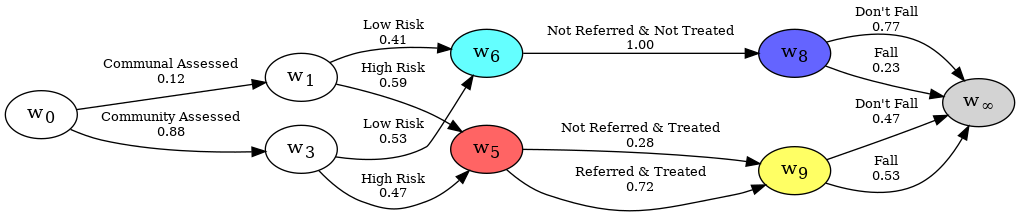

In [9]:
reducer.clear_all_evidence()

reducer.add_uncertain_node_set_list(
    [
        {"w5", "w6"},
        {"w9", "w8"},
    ]
)
reducer.graph.create_figure()